In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns

In [3]:
adult = pd.read_csv("../data sets/adult.csv")

FileNotFoundError: [Errno 2] File ../data sets/adult.csv does not exist: '../data sets/adult.csv'

In [3]:
adult

age         workclass  fnlwgt     education  education-num  \
0       39         State-gov   77516     Bachelors             13   
1       50  Self-emp-not-inc   83311     Bachelors             13   
2       38           Private  215646       HS-grad              9   
3       53           Private  234721          11th              7   
4       28           Private  338409     Bachelors             13   
5       37           Private  284582       Masters             14   
6       49           Private  160187           9th              5   
7       52  Self-emp-not-inc  209642       HS-grad              9   
8       31           Private   45781       Masters             14   
9       42           Private  159449     Bachelors             13   
10      37           Private  280464  Some-college             10   
11      30         State-gov  141297     Bachelors             13   
12      23           Private  122272     Bachelors             13   
13      32           Private  205019    Assoc-acdm             12   
14      40           Private  121772     Assoc-voc             11   
15      34           Private  245487       7th-8th              4   
16      25  Self-emp-not-inc  176756       HS-grad              9   
17      32           Private  186824       HS-grad              9   
18      38           Private   28887          11th              7   
19      43  Self-emp-not-inc  292175       Masters             14   
20      40           Private  193524     Doctorate             16   
21      54           Private  302146       HS-grad              9   
22      35       Federal-gov   76845           9th              5   
23      43           Private  117037          11th              7   
24      59           Private  109015       HS-grad              9   
25      56         Local-gov  216851     Bachelors             13   
26      19           Private  168294       HS-grad              9   
27      54                 ?  180211  Some-college             10   
28      39           Private  367260       HS-grad              9   
29      49           Private  193366       HS-grad              9   
...    ...               ...     ...           ...            ...   
32531   30                 ?   33811     Bachelors             13   
32532   34           Private  204461     Doctorate             16   
32533   54           Private  337992     Bachelors             13   
32534   37           Private  179137  Some-college             10   
32535   22           Private  325033          12th              8   
32536   34           Private  160216     Bachelors             13   
32537   30           Private  345898       HS-grad              9   
32538   38           Private  139180     Bachelors             13   
32539   71                 ?  287372     Doctorate             16   
32540   45         State-gov  252208       HS-grad              9   
32541   41                 ?  202822       HS-grad              9   
32542   72                 ?  129912       HS-grad              9   
32543   45         Local-gov  119199    Assoc-acdm             12   
32544   31           Private  199655       Masters             14   
32545   39         Local-gov  111499    Assoc-acdm             12   
32546   37           Private  198216    Assoc-acdm             12   
32547   43           Private  260761       HS-grad              9   
32548   65  Self-emp-not-inc   99359   Prof-school             15   
32549   43         State-gov  255835  Some-college             10   
32550   43  Self-emp-not-inc   27242  Some-college             10   
32551   32           Private   34066          10th              6   
32552   43           Private   84661     Assoc-voc             11   
32553   32           Private  116138       Masters             14   
32554   53           Private  321865       Masters             14   
32555   22           Private  310152  Some-college             10   
32556   27           Private  257302    Assoc-acdm             12   
32557

#### We begin with an analysis of the gender distribution

In [4]:
females_num = np.sum(adult['sex'] == 'Female') # Fancy way of counting true values in an array
print('Number of females: ' + str(females_num)) 
highly_paid_fem = np.sum((adult['sex'] == 'Female') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid females: ' + str(highly_paid_fem))
highly_paid_fem_per = highly_paid_fem / females_num
print('Percentage of highly paid females: ' + str(highly_paid_fem_per) + '%')

males_num = np.sum(adult['sex'] == 'Male')
print('Number of males: ' + str(males_num)) 
highly_paid_male = np.sum((adult['sex'] == 'Male') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid males: ' + str(highly_paid_male))
highly_paid_male_per = highly_paid_male / males_num
print('Percentage of highly paid males: ' + str(highly_paid_male_per) + '%')

Number of females: 10771
Number of highly paid females: 1179
Percentage of highly paid females: 0.10946058861758426%
Number of males: 21790
Number of highly paid males: 6662
Percentage of highly paid males: 0.3057365764111978%


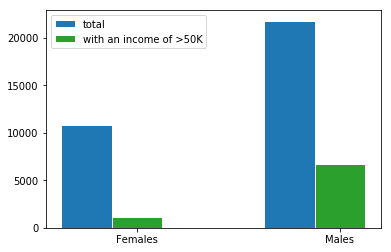

In [17]:
barWidth = .25

bars1 = [females_num, males_num]
bars2 = [highly_paid_fem, highly_paid_male]
x_labels = ('Females', 'Males')
y_pos1 = np.arange(len(bars1))
y_pos2 = [x + barWidth for x in y_pos1]

plt.bar(y_pos1, bars1, color='tab:blue',  width=barWidth, edgecolor='white', label='total')
plt.bar(y_pos2, bars2, color='tab:green',  width=barWidth, edgecolor='white', label='with an income of >50K')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

This data set contains about twice as many males as females. And about six times as many highly paid males as highly paid females. So high earning females are a minority in this data set.

#### Check the categories in the sensetiv attribute race

In [6]:
pd.unique(adult['race']) 

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

#### And analyze the distributions

In [1]:
white_num = np.sum(adult['race'] == 'White') # Fancy way of counting true values in an array
print('Number of white people: ' + str(white_num)) 
highly_paid_whites = np.sum((adult['race'] == 'White') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid white people: ' + str(highly_paid_whites))
highly_paid_whites_per = highly_paid_whites / white_num
print('Percentage of highly paid white people: ' + str(highly_paid_whites_per) + '%')
print('')
black_num = np.sum(adult['race'] == 'Black') # Fancy way of counting true values in an array
print('Number of black people: ' + str(black_num)) 
highly_paid_black = np.sum((adult['race'] == 'Black') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid black people: ' + str(highly_paid_black))
highly_paid_black_per = highly_paid_black / black_num
print('Percentage of highly paid black people: ' + str(highly_paid_black_per) + '%')
print('')
asian_num = np.sum(adult['race'] == 'Asian-Pac-Islander') # Fancy way of counting true values in an array
print('Number of asian people: ' + str(asian_num)) 
highly_paid_asian = np.sum((adult['race'] == 'Asian-Pac-Islander') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid asian people: ' + str(highly_paid_asian))
highly_paid_asian_per = highly_paid_asian / asian_num
print('Percentage of highly paid asian people: ' + str(highly_paid_asian_per) + '%')
print('')
indian_num = np.sum(adult['race'] == 'Amer-Indian-Eskimo') # Fancy way of counting true values in an array
print('Number of indian people: ' + str(indian_num)) 
highly_paid_indian = np.sum((adult['race'] == 'Amer-Indian-Eskimo') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid indian people: ' + str(highly_paid_indian))
highly_paid_indian_per = highly_paid_indian / indian_num
print('Percentage of highly paid indian people: ' + str(highly_paid_indian_per) + '%')
print('')
other_num = np.sum(adult['race'] == 'Other') # Fancy way of counting true values in an array
print('Number of others: ' + str(other_num)) 
highly_paid_other = np.sum((adult['race'] == 'Other') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid others: ' + str(highly_paid_other))
highly_paid_other_per = highly_paid_other / other_num
print('Percentage of highly paid others: ' + str(highly_paid_other_per))

NameError: name 'np' is not defined

#### Lets plot this informations

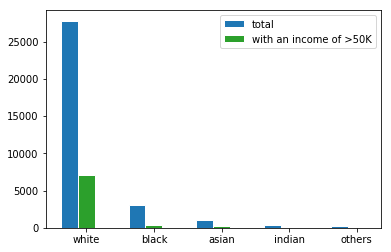

In [15]:
barWidth = 0.25
bars1 = [white_num, black_num, asian_num, indian_num, other_num]
bars2 = [highly_paid_whites, highly_paid_black, highly_paid_asian, highly_paid_indian, highly_paid_other]
x_labels = ['white', 'black', 'asian', 'indian', 'others']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='with an income of >50K')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()


#### Ok, looks like white people strongly dominate the data set :/

#### Lets compare white people against the sum of all the others

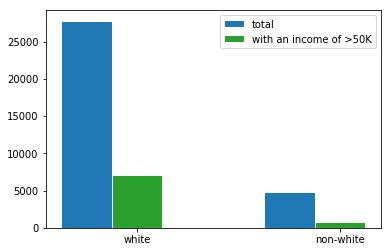

In [14]:
barWidth = 0.25
bars1 = [white_num, black_num + asian_num + indian_num + other_num]
bars2 = [highly_paid_whites, highly_paid_black + highly_paid_asian + highly_paid_indian + highly_paid_other]
x_labels = ['white', 'non-white']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='with an income of >50K')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()

#### The paper uses combined attributes like race-sex (e.g. white-female), so we would like to get an ordered list with numbers of the combined attributes

In [11]:
import itertools

races = pd.unique(adult['race']) 
genders = ['Male', 'Female']
combined = list(itertools.product(races, genders))
combined_list = []
for c in combined:
    print(str(c) + ': ' + str(np.sum((adult['race'] == c[0]) & (adult['sex'] == c[1]))))
    combined_list.append([c, np.sum((adult['race'] == c[0]) & (adult['sex'] == c[1]))])

('White', 'Male'): 19174
('White', 'Female'): 8642
('Black', 'Male'): 1569
('Black', 'Female'): 1555
('Asian-Pac-Islander', 'Male'): 693
('Asian-Pac-Islander', 'Female'): 346
('Amer-Indian-Eskimo', 'Male'): 192
('Amer-Indian-Eskimo', 'Female'): 119
('Other', 'Male'): 162
('Other', 'Female'): 109


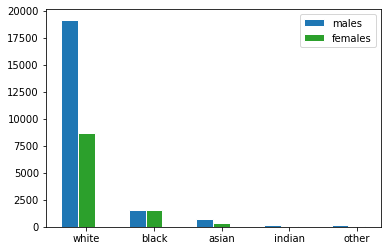

In [29]:
barWidth = 0.25

bars1 = [combined_list[0][1], combined_list[2][1], combined_list[4][1], combined_list[6][1], combined_list[8][1]]
bars2 = [combined_list[1][1], combined_list[3][1], combined_list[5][1], combined_list[7][1], combined_list[9][1]]

x_labels = ['white', 'black', 'asian', 'indian', 'other']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='females')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()


#### income for white males and females

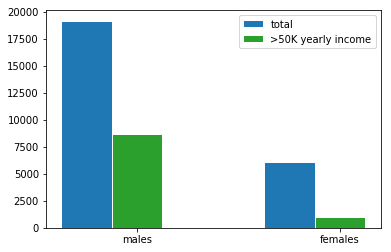

In [12]:
hewm = np.sum((adult['race'] == 'White') & (adult['sex'] == 'Male') & (adult['income-per-year'] == '>50K'))
hewf = np.sum((adult['race'] == 'White') & (adult['sex'] == 'Female') & (adult['income-per-year'] == '>50K'))

bars1 = [combined_list[0][1], hewm]
bars2 = [combined_list[1][1], hewf]

x_labels = ['males', 'females']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='>50K yearly income')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()

#### income for non-white males and females

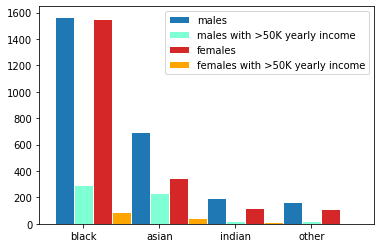

In [158]:
# calculate sum of high earning indivduals for each gender and race
highly_paid_males = []
highly_paid_females = []
for r in pd.unique(adult['race']) :
    if r != 'White':
        highly_paid_males.append(np.sum((adult['race'] == r) 
                                      & (adult['sex'] == 'Male') & (adult['income-per-year'] == '>50K')))
        highly_paid_females.append(np.sum((adult['race'] == r) 
                                      & (adult['sex'] == 'Female') & (adult['income-per-year'] == '>50K')))

bars1 = [x[1] for x in combined_list[2::2]]
bars2 = highly_paid_males
bars3 = [x[1] for x in combined_list[3::2]]
bars4 = highly_paid_females

x_labels = ['black', 'asian', 'indian', 'other']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='aquamarine', width=barWidth, edgecolor='white', label='males with >50K yearly income')
plt.bar(r3, bars3, color='tab:red', width=barWidth, edgecolor='white', label='females')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='females with >50K yearly income')


plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()